<a href="https://colab.research.google.com/github/nourezzeddine1/VIP401/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


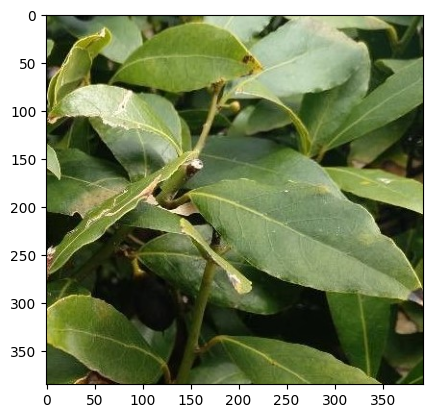

In [6]:
image_path = '/content/drive/My Drive/image1.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
pixel_vals = image.reshape((-1,3))
print(pixel_vals.shape)

(151305, 3)


In [9]:
pixel_vals = np.float32(pixel_vals) #must be coverted to float before adding it as an input to the kmeans function

In [10]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

In [12]:
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

*Input parameters*
1. samples : It should be of np.float32 data type, and each feature should be put in a single column.
2. nclusters(K) : Number of clusters required at end
3. criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
type of termination criteria. It has 3 flags as below:
cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
max_iter - An integer specifying maximum number of iterations.
epsilon - Required accuracy
4. attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

 In K-means, "attempts" typically refer to the number of times the algorithm is run with different initializations of cluster centroids. Since K-means can converge to suboptimal solutions depending on the initial placement of centroids, multiple attempts with different initializations can help mitigate this issue. The algorithm selects the best solution (with the lowest total within-cluster variance) among these attempts.

5. flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

  cv.KMEANS_PP_CENTERS: This flag indicates the usage of the K-means++ algorithm for initializing the cluster centroids. K-means++ is a method that aims to choose initial cluster centers that are well spread out across the data points, which often leads to faster convergence and better clustering results compared to random initialization. It helps to avoid poor local optima.

   cv.KMEANS_RANDOM_CENTERS: This flag indicates the usage of random initialization for cluster centroids. With this method, the initial centroids are chosen randomly from the data points. While random initialization is simpler and computationally less expensive than K-means++, it can sometimes result in suboptimal clustering solutions, especially for complex datasets.

*Output parameters*
1. compactness : It is the sum of squared distance from each point to their corresponding centers.
2. labels : This is the label array (same as 'code' in previous article) where each element marked '0', '1'.....
3. centers : This is array of centers of clusters.


In [17]:
print(retval)

99613084.94359833


In [18]:
print(labels)

[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


In [19]:
print(centers)

[[ 66  83  33]
 [109 127  62]
 [ 23  33  10]
 [145 162 105]
 [196 208 164]]


In [20]:
centers = np.uint8(centers)

In [14]:
segmented_data = centers[labels.flatten()]

In [15]:
segmented_image = segmented_data.reshape((image.shape))

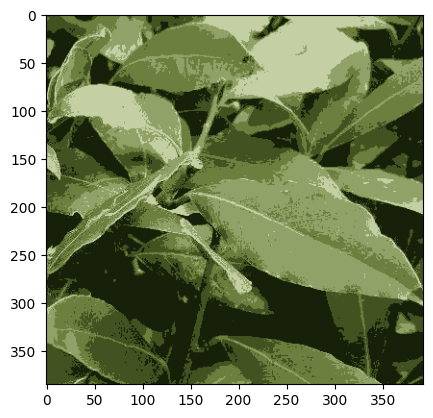

In [16]:
plt.imshow(segmented_image)